### Import Packages

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### Import Dataset

In [2]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

### Data Audit

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

### Data Visualization

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

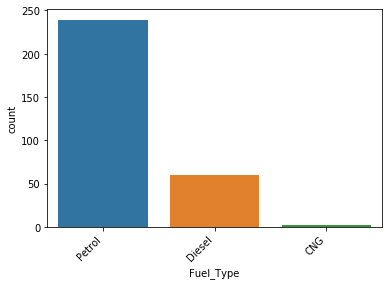

In [7]:
sns.countplot(df['Fuel_Type'])
plt.xticks(rotation=45,ha='right')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

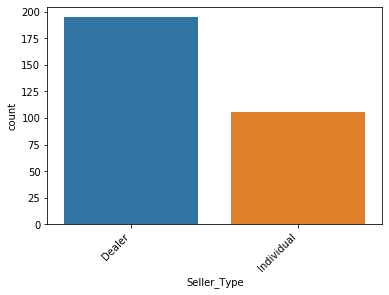

In [8]:
sns.countplot(df['Seller_Type'])
plt.xticks(rotation=45,ha='right')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

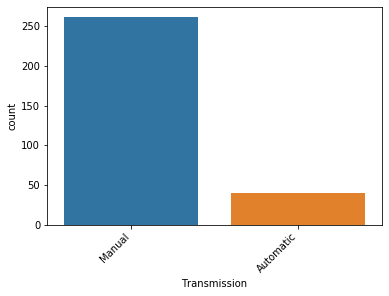

In [9]:
sns.countplot(df['Transmission'])
plt.xticks(rotation=45,ha='right')

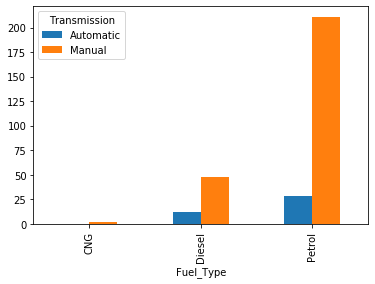

In [10]:
table=pd.crosstab(df['Fuel_Type'],df['Transmission'])
table.plot(kind='bar')

([0, 1, 2], <a list of 3 Text xticklabel objects>)

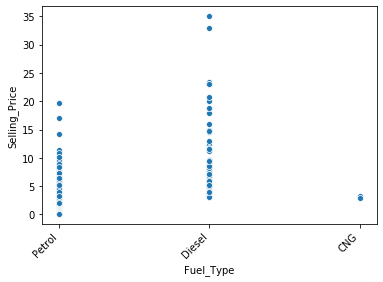

In [11]:
sns.scatterplot(df['Fuel_Type'],df['Selling_Price'])
plt.xticks(rotation=45,ha='right')

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.]), <a list of 8 Text xticklabel objects>)

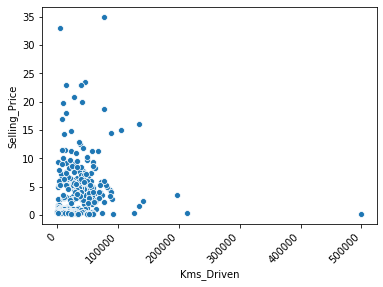

In [12]:
sns.scatterplot(df['Kms_Driven'],df['Selling_Price'])
plt.xticks(rotation=45,ha='right')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 <a list of 9 Text xticklabel objects>)

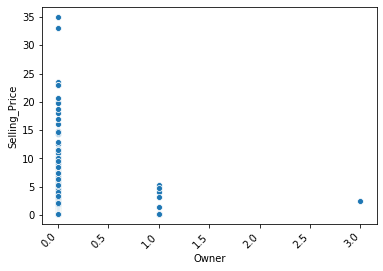

In [13]:
sns.scatterplot(df['Owner'],df['Selling_Price'])
plt.xticks(rotation=45,ha='right')

([0, 1, 2], <a list of 3 Text xticklabel objects>)

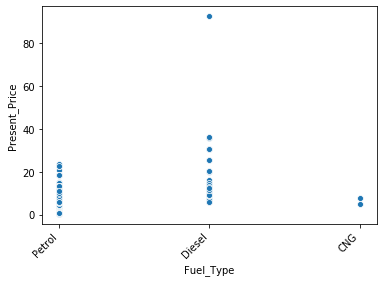

In [14]:
sns.scatterplot(df['Fuel_Type'],df['Present_Price'])
plt.xticks(rotation=45,ha='right')

### Feature Engineering

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
df['Years_Old']=pd.datetime.now().year-df['Year']

In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [18]:
df.drop(['Year'],axis=1,inplace=True)

In [19]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Old
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [20]:
df=pd.get_dummies(data=df,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

In [21]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,7,0,1,0,1
1,sx4,4.75,9.54,43000,0,8,1,0,0,1
2,ciaz,7.25,9.85,6900,0,4,0,1,0,1
3,wagon r,2.85,4.15,5200,0,10,0,1,0,1
4,swift,4.60,6.87,42450,0,7,1,0,0,1


In [22]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [23]:
df.head(18)

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
5,9.25,9.83,2071,0,3,1,0,0,1
6,6.75,8.12,18796,0,6,0,1,0,1
7,6.50,8.61,33429,0,6,1,0,0,1
8,8.75,8.89,20273,0,5,1,0,0,1
9,7.45,8.92,42367,0,6,1,0,0,1


### X and Y variable creation

In [24]:
Y=df.iloc[:,0]
X=df.iloc[:,1:]

In [25]:
X

,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,5,1,0,0,1
297,5.90,60000,0,6,0,1,0,1
298,11.00,87934,0,12,0,1,0,1
299,12.50,9000,0,4,1,0,0,1


In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(240, 8)
(240,)
(61, 8)
(61,)


### Feature Scaling

In [28]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [29]:
def apply_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    
    #Predictions
    y_train_preds=model.predict(x_train)
    y_test_preds=model.predict(x_test)
    
    # x_train data 
    mse = mean_squared_error(y_train, y_train_preds)
    mae = mean_absolute_error(y_train, y_train_preds)
    r2 = r2_score(y_train, y_train_preds)
    rmse=np.sqrt(mse)

    print("MSE on x_train data: ", mse)
    print("MAE on x_train data: ", mae)
    print("RMSE on x_train data: ", rmse)
    print("R squared on x_train data: ", r2)  
    
    print()
    print("#"*50)
    print()
    
    # x_test data 
    mse = mean_squared_error(y_test, y_test_preds)
    mae = mean_absolute_error(y_test, y_test_preds)
    r2 = r2_score(y_test, y_test_preds)
    rmse=np.sqrt(mse)
    
    print("MSE on x_test data: ", mse)
    print("MAE on x_test data: ", mae)
    print("RMSE on x_test data: ", rmse)
    print("R squared on test data: ", r2)
    
    print()
    print("#"*50)
    print()
    
    plot_prices(y_train, y_train_preds, "TRAINING SET")
    
    plot_prices(y_test, y_test_preds, "TEST SET")

In [30]:
def plot_prices(y,y_preds, name):
    plt.figure(figsize=(10, 10))
    plt.plot(range(0, len(y)), y, label="Actual selling price", marker="*", linewidth=1)
    plt.plot(range(0, len(y_preds)), y_preds, label="Predicted selling price", marker="*", linewidth=1)
    plt.xlabel("Indices",fontsize=20)
    plt.ylabel("Selling Price of Cars",fontsize=20)
    plt.title("Actual Selling Price Vs. Predicted Selling Price",fontsize=20)
    plt.show()

### Hyperparameter Tuning

In [31]:
knn=KNeighborsRegressor()
parameters={'n_neighbors':[5,6,7,8,9,10,11,12,13,14,15]}
gs=GridSearchCV(knn,parameters,cv=10)
gs.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                         15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
gs.best_score_

0.8499737130117815

In [33]:
gs.best_params_

{'n_neighbors': 5}

In [34]:
rf=RandomForestRegressor()
parameters={'n_estimators':[100,200,300,400,500,600,700,800,900,1000],
            'max_features':['auto','sqrt'],
            'max_depth':[5,10,15,20,25],
            }
gs=GridSearchCV(rf,parameters,cv=10)
gs.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [35]:
gs.best_score_

0.9117941448529636

In [36]:
gs.best_params_

{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 100}

### Linear Regression

In [37]:
linear=LinearRegression()

MSE on x_train data:  2.953602321164226
MAE on x_train data:  1.1403638852038633
RMSE on x_train data:  1.7186047600202399
R squared on x_train data:  0.89289581242029

##################################################

MSE on x_test data:  3.3804678399570323
MAE on x_test data:  1.2878826382848154
RMSE on x_test data:  1.8386048623771862
R squared on test data:  0.8172782474447742

##################################################



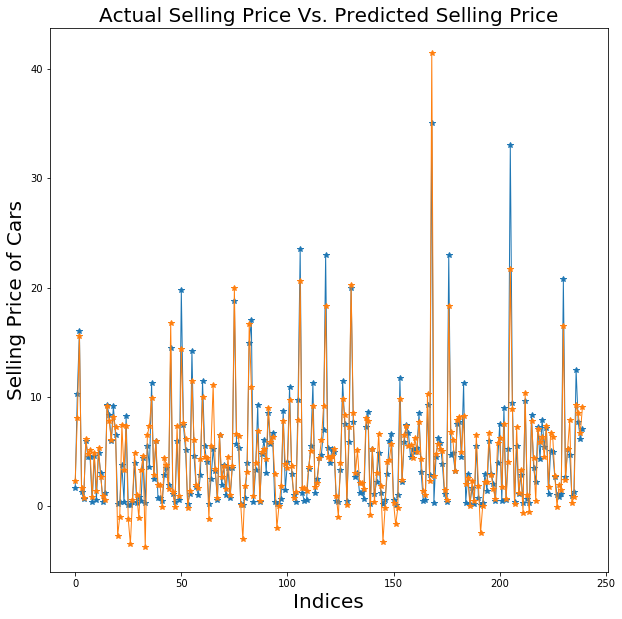

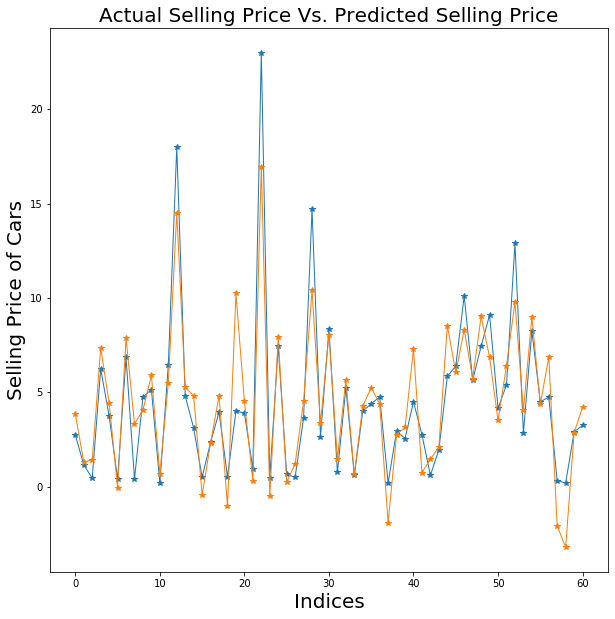

In [38]:
apply_model(linear,x_train,y_train,x_test,y_test)

### K-Neighbors Regressor

In [39]:
knn=KNeighborsRegressor(n_neighbors=5)

MSE on x_train data:  2.2771572333333334
MAE on x_train data:  0.7481000000000001
RMSE on x_train data:  1.5090252593423787
R squared on x_train data:  0.9174252153989062

##################################################

MSE on x_test data:  2.0191506885245896
MAE on x_test data:  0.8754098360655735
RMSE on x_test data:  1.4209682222078681
R squared on test data:  0.8908604459656704

##################################################



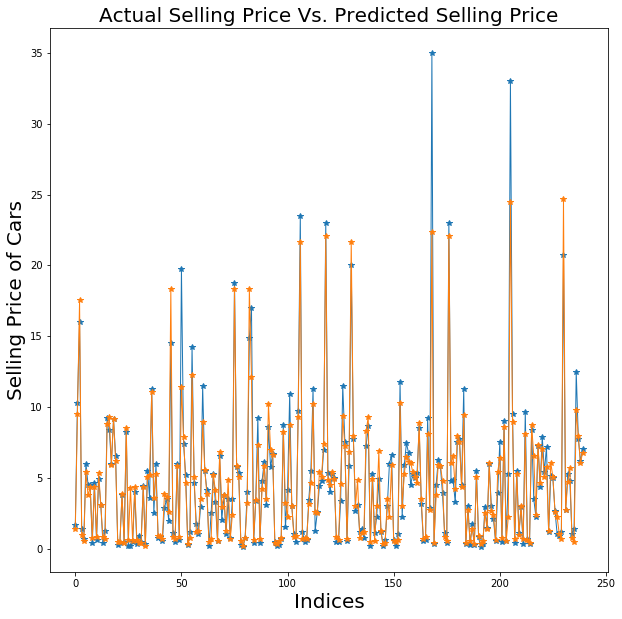

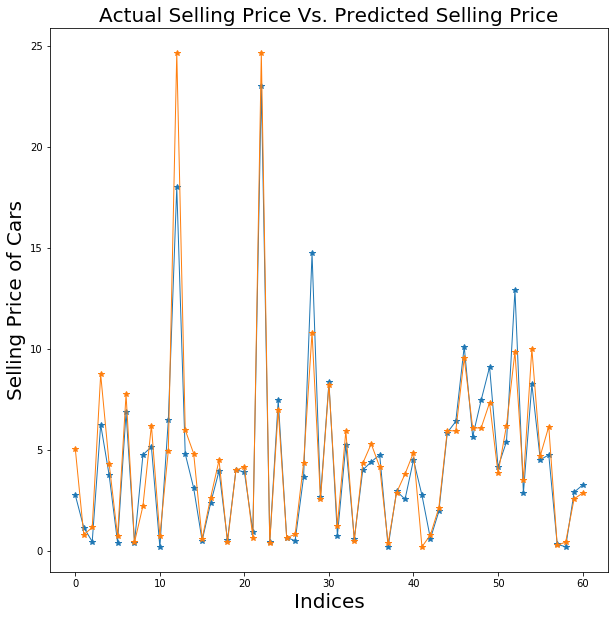

In [40]:
apply_model(knn,x_train,y_train,x_test,y_test)

### Random Forest Regressor

In [41]:
rf=RandomForestRegressor(n_estimators=100,max_depth=25,max_features='auto')

MSE on x_train data:  0.3121866528333331
MAE on x_train data:  0.2505466666666665
RMSE on x_train data:  0.5587366578571099
R squared on x_train data:  0.9886794178128343

##################################################

MSE on x_test data:  0.6852965701639353
MAE on x_test data:  0.5261508196721318
RMSE on x_test data:  0.8278264130625063
R squared on test data:  0.9629582068965841

##################################################



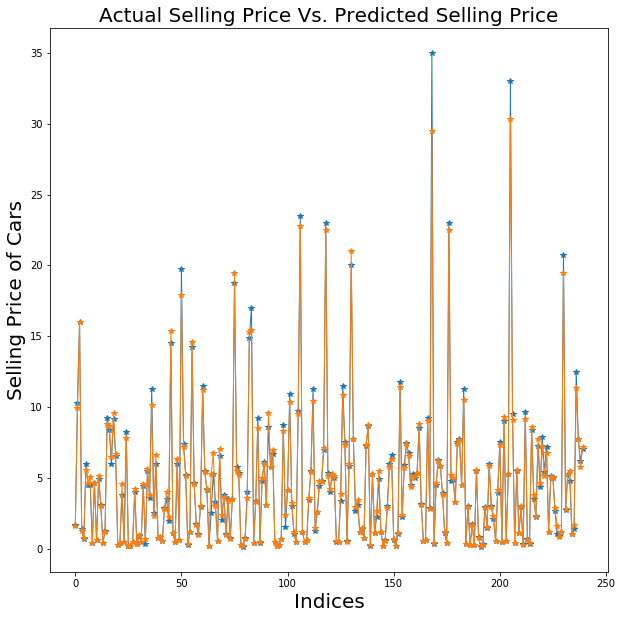

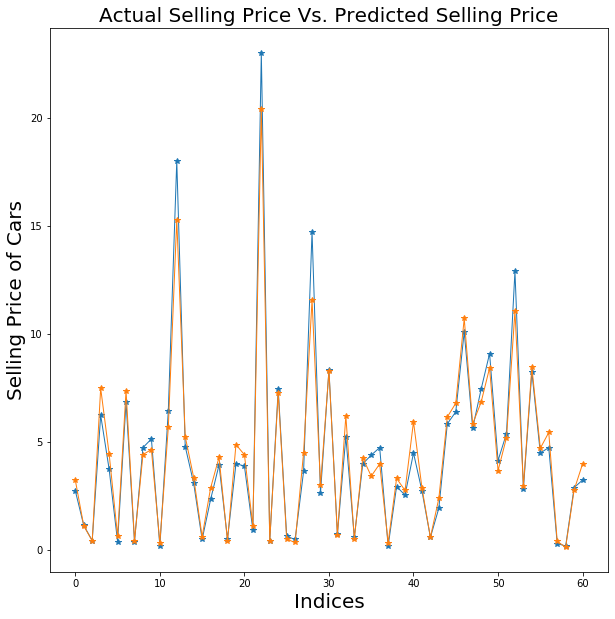

In [42]:
apply_model(rf,x_train,y_train,x_test,y_test)